In [2]:
from google.colab import drive
drive.mount("/content/drive")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, AveragePooling2D, MaxPooling2D, Conv2D, Activation, Dropout, Flatten, Input, Dense, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import cv2

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/GG Colab

In [ ]:
img = cv2.imread('cho.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape

In [ ]:
tranf = np.copy(img)
tranf

In [ ]:
sobelX = [[-1, 0, 1], [-2, 0, 2], [-1, 0, -1]]
sobelY = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

def getCoord(kernal):
  centerFilter = [1, 1]
  dx = [-1, 0, 1, 1, 1, 0, -1, -1, -1]
  dy = [-1, -1, -1, 0, 1, 1, 1, 0, -1]
  for i in range(8):
    pixelFilterX = centerFilter[0] + dx[i]
    pixelFilterY = centerFilter[1] + dy[i]
    print(f'Cor: {pixelFilterX}, {pixelFilterY}; value: {kernal[pixelFilterX][pixelFilterY]}')

In [ ]:
getCoord(sobelY)

Cor: 0, 0; value: 1
Cor: 1, 0; value: 0
Cor: 2, 0; value: -1
Cor: 2, 1; value: -2
Cor: 2, 2; value: -1
Cor: 1, 2; value: 0
Cor: 0, 2; value: 1
Cor: 0, 1; value: 2


In [ ]:
def conv(img, kernal):
  transform = np.copy(img)
  m, n = transform.shape[0], transform.shape[1]
  print(m, n)
  for i in range(1, m-1):
    for j in range(1, n - 1):
      centerPixel = [i, j]
      centerFilter = [1, 1]

      dx = [-1, 0, 1, 1, 1, 0, -1, -1, -1]
      dy = [-1, -1, -1, 0, 1, 1, 1, 0, -1]
      newVal = 0.0
      for k in range(8):
        item = [dx[k], dy[k]]
        pixelFilterX = centerFilter[0] + item[0]
        pixelFilterY = centerFilter[1] + item[1]

        pixelImgX = centerPixel[0] + item[0]
        pixelImgY = centerPixel[1] + item[1]

        newVal += img[pixelImgX][pixelImgY] * kernal[pixelFilterX][pixelFilterY]
      newVal += img[i][j] * kernal[1][1]
      if newVal < 0:
        newVal = 0
      if newVal > 255:
        newVal = 255
      transform[i][j] = newVal
  return transform





469 750


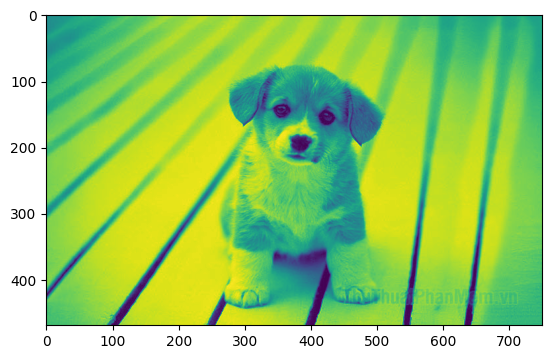

In [ ]:
result = conv(img, sobelX)
plt.imshow(img)

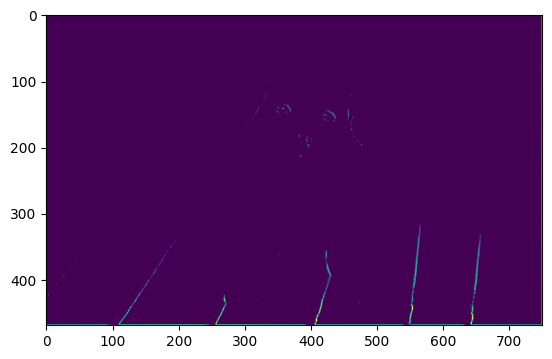

In [ ]:
plt.imshow(result)